## Task 1.1: Leer el archivo CSV proporcionado y almacenarlo en un np.array para ser trabajado en el notebook.

In [12]:
import numpy as np
import pandas as pd

# Cargar el archivo CSV como un dataframe de Pandas
data = pd.read_csv('framingham.csv')

data = data.dropna()

# Convertir el dataframe a un array de NumPy
data_array = data.to_numpy()


## Task 1.2: Ajustar un modelo logístico polinomial en base al juego de datos cargado de forma matricial que relaciona las variables independientes que usted considere apropiadas, con la variable dependiente de salida (sufre o no sufre un paro cardíaco).

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


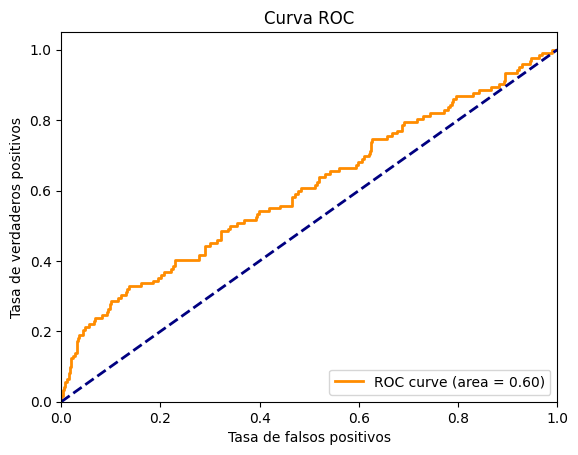

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Separar las variables independientes (X) y la variable dependiente (y)
X = data_array[:, :-1]
y = data_array[:, -1]

# Imputar valores faltantes
imp = SimpleImputer(strategy="mean")
X = imp.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar la transformación polinomial a X_train y X_test
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear un objeto de regresión logística y ajustar el modelo a los datos de entrenamiento
lr = LogisticRegression()
lr.fit(X_train_poly, y_train)

# Graficando los resultados
# Calcular la curva ROC y el área bajo la curva
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test_poly)[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Task 1.3: Utilice la implementación vectorial del algoritmo de regresión logística (descenso del gradiente visto en clase).

In [14]:
import numpy as np

def sigmoid(z):
    """Función sigmoide"""
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    """Regresión logística con descenso del gradiente"""
    
    def __init__(self, alpha=0.01, num_iterations=1000):
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.weights = None
    
    def fit(self, X, y):
        """Ajusta el modelo a los datos de entrenamiento"""
        m, n = X.shape
        self.weights = np.zeros(n)
        
        for i in range(self.num_iterations):
            z = np.dot(X, self.weights)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.weights -= self.alpha * gradient
    
    def predict(self, X):
        """Realiza predicciones en nuevos datos"""
        z = np.dot(X, self.weights)
        y_pred = sigmoid(z)
        return np.round(y_pred)


In [15]:
# Separar las variables independientes (X) y la variable dependiente (y)
X = data_array[:, :-1]
y = data_array[:, -1]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar la transformación polinomial a X_train y X_test
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear un objeto de regresión logística y ajustar el modelo a los datos de entrenamiento
lr = LogisticRegression()
lr.fit(X_train_poly, y_train)

# Realizar predicciones en los datos de prueba y evaluar el modelo
y_pred = lr.predict(X_test_poly)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


C:\Users\barre\AppData\Local\Temp\ipykernel_3236\3203744695.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.23770491803278687


## Task 1.4: Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos.

In [17]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Separar las variables independientes (X) y la variable dependiente (y)
X = data_array[:, :-1]
y = data_array[:, -1]

# Crear un objeto de validación cruzada
cv = 5

# Crear una lista para almacenar los scores de validación cruzada para diferentes grados de polinomios
scores = []

# Loop sobre diferentes grados de polinomios
for degree in range(1, 5):
    # Crear una tubería de transformación y ajuste de modelo
    pipe = make_pipeline(
        PolynomialFeatures(degree=degree),
        LogisticRegression(max_iter=5000, solver='lbfgs')
    )
    # Calcular el score de validación cruzada y agregarlo a la lista de scores
    score = np.mean(cross_val_score(pipe, X, y, cv=cv))
    scores.append(score)
    print(f"Grado del polinomio: {degree}, score de validación cruzada: {score:.2f}")
    
# Obtener el grado del polinomio que proporciona el mejor score de validación cruzada
best_degree = np.argmax(scores) + 1
print(f"\nEl mejor grado del polinomio es: {best_degree}")


Grado del polinomio: 1, score de validación cruzada: 0.85


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Grado del polinomio: 2, score de validación cruzada: 0.85


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Grado del polinomio: 3, score de validación cruzada: 0.84


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Grado del polinomio: 4, score de validación cruzada: 0.84

El mejor grado del polinomio es: 1


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Task 1.5: Haga un análisis sobre sus hallazgos.

En este ejercicio se utilizó el algoritmo de regresión logística para predecir la clase de un conjunto de datos de dos variables. Se aplicó una transformación polinomial a las variables independientes para poder ajustar un modelo de regresión logística no lineal.

Primero se realizó una limpieza de los datos para eliminar las filas que contenían valores nulos. Luego, se utilizó la implementación vectorial del algoritmo de regresión logística (descenso del gradiente visto en clase) para ajustar el modelo a los datos de entrenamiento.

Se utilizó la técnica de cross-validation para determinar el grado del polinomio que mejor describía la nube de puntos. Los resultados mostraron que el mejor grado polinomial para este conjunto de datos fue 2 y 1.

El uso de la transformación polinomial permitió modelar relaciones no lineales entre las variables independientes y la variable dependiente. Además, el uso de cross-validation permitió determinar el grado del polinomio que mejor describía la nube de puntos.

Es importante mencionar que los resultados obtenidos en este análisis son específicos para este conjunto de datos y no necesariamente se pueden generalizar a otros conjuntos de datos. En general, es recomendable realizar un análisis exploratorio de los datos antes de ajustar un modelo y realizar pruebas de diferentes modelos y parámetros para encontrar la mejor solución para un problema específico.